In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression


In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data  = pd.read_csv('drive/MyDrive/purchase data.csv')
data.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [ ]:
data.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [ ]:
data.isnull().sum()

,0
ID,0
Day,0
Incidence,0
Brand,0
Quantity,0
Last_Inc_Brand,0
Last_Inc_Quantity,0
Price_1,0
Price_2,0
Price_3,0


In [ ]:
features = ['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']

In [ ]:
data1 = data.copy()
data1 = data1[features]
data1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,47,1,110866,1,0
1,0,0,47,1,110866,1,0
2,0,0,47,1,110866,1,0
3,0,0,47,1,110866,1,0
4,0,0,47,1,110866,1,0


In [ ]:
scaler = pickle.load(open('drive/MyDrive/ss.pickle', 'rb'))
pca = pickle.load(open('drive/MyDrive/pca.pickle','rb'))
kmeans_pca = pickle.load(open('drive/MyDrive/kmeans_pca.pickle','rb'))

In [ ]:
scaled_data = scaler.transform(data1)
pca_data  = pca.transform(scaled_data)
seg_data  = kmeans_pca.predict(pca_data)


In [ ]:
data['Customer Segment'] = seg_data
data.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3


In [ ]:
data['Customer Segment'].value_counts()

,count
Customer Segment,
3,21495
1,13580
0,12123
2,11495


In [ ]:
data['Customer Segment'] = data['Customer Segment'].map({0:'standard',
                                                          1:'career focused',
                                                          2:'well-off',
                                                          3:'fewer opportunities'})

In [ ]:
data.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,fewer opportunities
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,fewer opportunities
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,fewer opportunities
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,fewer opportunities
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,fewer opportunities


# Purchase Probability Model for Well-Off Segment


In [ ]:
WellOff_data  = data.copy()
WellOff_data = WellOff_data[WellOff_data['Customer Segment'] == "well-off"]
X = pd.DataFrame()
X['Mean_price'] = (WellOff_data['Price_1'] + WellOff_data['Price_2'] +  WellOff_data['Price_3'] + WellOff_data['Price_4'] + WellOff_data['Price_5'])/5
y = WellOff_data['Incidence']

WO_pp_model  = LogisticRegression()
WO_pp_model.fit(X,y)

LogisticRegression()

In [ ]:
WO_pp_model.coef_  # with increase in price the purchase probability decreases

array([[-1.24578907]])

# Purchase Probability Model for Career Focused Segment

In [ ]:
CF_data = data.copy()


CF_data  = CF_data[ CF_data['Customer Segment'] ==  "career focused"]
X1 = pd.DataFrame()
X1['Mean_Price1'] = (CF_data['Price_1']+
                    CF_data['Price_2'] +
                    CF_data['Price_3'] +
                    CF_data['Price_4'] +
                    CF_data['Price_5']) / 5

y1 = CF_data['Incidence']

CF_pp_model = LogisticRegression()
CF_pp_model.fit(X1,y1)

LogisticRegression()

# Purchase Probability model for Standard Segment

In [ ]:
S_data = data.copy()


S_data = S_data[S_data['Customer Segment'] == "standard"]
X2  = pd.DataFrame()
X2['Mean_Price2'] = (S_data['Price_1']+
                     S_data['Price_2']+
                     S_data['Price_3']+
                     S_data['Price_4']+
                     S_data['Price_5']) / 5

y2 =  S_data['Incidence']

Standard_pp_model  = LogisticRegression()
Standard_pp_model.fit(X2,y2)

LogisticRegression()

# Purchase Probability model for Fewer Opp segment

In [ ]:
FO_data = data.copy()
FO_data  = FO_data[FO_data['Customer Segment'] == "fewer opportunities"]
X3 = pd.DataFrame()
X3['Mean_price3'] = (FO_data['Price_1'] +
                    FO_data['Price_2'] +
                    FO_data['Price_3'] +
                    FO_data['Price_4'] +
                    FO_data['Price_5'] ) / 5
y3 = FO_data['Incidence']

FO_pp_model = LogisticRegression()
FO_pp_model.fit(X3, y3)


LogisticRegression()

# Own Brand 2 vs Cross Brand 1  Price Elasticity for well-off segment

In [ ]:
ownBrand2 = data[data['Incidence'] == 1]
ownBrand2 = ownBrand2[ownBrand2['Customer Segment'] == "well-off"]
ownBrand2.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Customer Segment
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,0,0,1,1,52,2,159052,2,1,well-off
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,1,0,1,1,52,2,159052,2,1,well-off
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,0,0,1,1,52,2,159052,2,1,well-off
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,1,0,1,1,52,2,159052,2,1,well-off
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,1,0,1,1,52,2,159052,2,1,well-off


In [ ]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X =ownBrand2[features]
y = ownBrand2['Brand']
model_ownBrand2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_ownBrand2.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
model_ownBrand2.coef_

array([[-2.16393691, -0.95513085,  1.96445989,  2.5022238 , -1.00820229],
       [ 1.36645401, -1.36134591, -1.56978967,  1.01229664, -0.2380986 ],
       [ 0.74014192,  1.23436777, -0.63866334, -0.3521376 ,  1.04857701],
       [ 0.1390907 ,  0.7937378 ,  0.07636429, -1.86635408,  0.5986874 ],
       [-0.08174972,  0.28837118,  0.16762884, -1.29602875, -0.40096352]])

In [ ]:
bc_coef = pd.DataFrame(model_ownBrand2.coef_)
beta2 =round(bc_coef[1][1],2)

In [ ]:
beta2

-1.36

In [ ]:
ownBrand2_wo = data[data['Incidence'] == 1]
ownBrand2_wo = ownBrand2_wo[ownBrand2_wo['Customer Segment'] == "well-off"]
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X =ownBrand2_wo[features]
y = ownBrand2_wo['Brand']
model_ownBrand2_wo = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_ownBrand2_wo.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
price_range = np.arange(0.5, 3.5, 0.01)

In [ ]:
df_ownBrand2_wo = pd.DataFrame(index = np.arange(price_range.size))
df_ownBrand2_wo['Price_1'] = ownBrand2_wo['Price_1'].mean()
df_ownBrand2_wo['Price_2'] = price_range
df_ownBrand2_wo['Price_3'] = ownBrand2_wo['Price_3'].mean()
df_ownBrand2_wo['Price_4'] = ownBrand2_wo['Price_4'].mean()
df_ownBrand2_wo['Price_5'] = ownBrand2_wo['Price_5'].mean()



pr_ownBrand2_wo = model_ownBrand2_wo.predict_proba(df_ownBrand2_wo)
pr_ownBrand2_wo = pr_ownBrand2_wo[: , 1]
pe_ownBrand2_wo =  beta2 * price_range * (1 - pr_ownBrand2_wo)

In [ ]:
df_pe = pd.DataFrame()
df_pe['pe_ownBrand2_wo'] = pe_ownBrand2_wo
df_pe.head()
pd.options.display.max_rows = None


In [ ]:
df_crossBrand1_wo = pd.DataFrame(index = np.arange(price_range.size))
df_crossBrand1_wo['Price_1'] = price_range
df_crossBrand1_wo['Price_2'] = ownBrand2_wo['Price_2'].mean()
df_crossBrand1_wo['Price_3'] = ownBrand2_wo['Price_3'].mean()
df_crossBrand1_wo['Price_4'] = ownBrand2_wo['Price_4'].mean()
df_crossBrand1_wo['Price_5'] = ownBrand2_wo['Price_5'].mean()



pr_crossBrand1_wo = model_ownBrand2_wo.predict_proba(df_crossBrand1_wo)
pr_crossBrand1_wo = pr_crossBrand1_wo[: , 1]
pe_crossBrand1_wo =  - beta2 * price_range * (1 - pr_crossBrand1_wo)

In [ ]:
df_pe['pe_crossBrand1_wo'] = pe_crossBrand1_wo

In [ ]:
df_pe['Price_Point'] = price_range
df_pe

,pe_ownBrand2_wo,pe_crossBrand1_wo,Price_Point
0,-0.370107,0.666078,0.50
1,-0.380244,0.679146,0.51
2,-0.390492,0.692201,0.52
3,-0.400852,0.705243,0.53
4,-0.411323,0.718271,0.54
5,-0.421905,0.731285,0.55
6,-0.432597,0.744286,0.56
7,-0.443400,0.757272,0.57
8,-0.454313,0.770244,0.58
9,-0.465336,0.783201,0.59


In [ ]:
## All the values of cross brand 1 price elasticity i.e. pe(cross) > 0
## which means that brand 1 is a substitute for brand 2
## let's check if it's a strong substitute or weak substitute
for i in range(0, len(df_pe)):
  if abs(df_pe['pe_crossBrand1_wo'][i]) < abs(df_pe['pe_ownBrand2_wo'][i]):
    s = df_pe['Price_Point'][i-1]
    break
  else:
    continue


round(s,2)

1.62

FOR WELL-OFF SEGMENT
Price Elasticity Context:

Strong Substitutability from 0.5 to 1.62: We've established that from a price of 0.5 up to 1.62, Brand 1 has a cross-price elasticity (PE) greater than the own price elasticity of Brand 2, making Brand 1 a strong substitute for Brand 2 within this range.
Interpretation for Brand 1's Selling Range (1.1 to 1.5):

Since Brand 1 typically sells within the range of 1.1 to 1.5, and this range falls within the broader 0.5 to 1.62 range where Brand 1 is considered a strong substitute for Brand 2, we can conclude that within its natural selling range, Brand 1 is a strong substitute for Brand 2.

In [ ]:
## For Standard segment
ownBrand2_sd = data[data['Incidence'] == 1]
ownBrand2_sd = ownBrand2_sd[ownBrand2_sd['Customer Segment'] == "standard"]
X =ownBrand2_sd[features]
y = ownBrand2_sd['Brand']
model_ownBrand2_sd = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_ownBrand2_sd.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
df_ownBrand2_sd = pd.DataFrame(index = np.arange(price_range.size))
df_ownBrand2_sd['Price_1'] = ownBrand2_sd['Price_1'].mean()
df_ownBrand2_sd['Price_2'] = price_range
df_ownBrand2_sd['Price_3'] = ownBrand2_sd['Price_3'].mean()
df_ownBrand2_sd['Price_4'] = ownBrand2_sd['Price_4'].mean()
df_ownBrand2_sd['Price_5'] = ownBrand2_sd['Price_5'].mean()



pr_ownBrand2_sd = model_ownBrand2_sd.predict_proba(df_ownBrand2_sd)
pr_ownBrand2_sd = pr_ownBrand2_sd[: , 1]
pe_ownBrand2_sd =  beta2 * price_range * (1 - pr_ownBrand2_sd)

In [ ]:
df_pe['pe_ownBrand2_sd'] = pe_ownBrand2_sd

In [ ]:
df_crossBrand1_sd = pd.DataFrame(index = np.arange(price_range.size))
df_crossBrand1_sd['Price_1'] = price_range
df_crossBrand1_sd['Price_2'] = ownBrand2_sd['Price_2'].mean()
df_crossBrand1_sd['Price_3'] = ownBrand2_sd['Price_3'].mean()
df_crossBrand1_sd['Price_4'] = ownBrand2_sd['Price_4'].mean()
df_crossBrand1_sd['Price_5'] = ownBrand2_sd['Price_5'].mean()



pr_crossBrand1_sd = model_ownBrand2_sd.predict_proba(df_crossBrand1_sd)
pr_crossBrand1_sd = pr_crossBrand1_sd[: , 1]
pe_crossBrand1_sd =  - beta2 * price_range * (1 - pr_crossBrand1_sd)

In [ ]:
df_pe['pe_crossBrand1_sd'] = pe_crossBrand1_sd

In [ ]:
df_pe

,pe_ownBrand2_wo,pe_crossBrand1_wo,Price_Point,pe_ownBrand2_sd,pe_crossBrand1_sd
0,-0.370107,0.666078,0.50,-0.043730,0.651479
1,-0.380244,0.679146,0.51,-0.045696,0.663429
2,-0.390492,0.692201,0.52,-0.047730,0.675300
3,-0.400852,0.705243,0.53,-0.049834,0.687091
4,-0.411323,0.718271,0.54,-0.052010,0.698797
5,-0.421905,0.731285,0.55,-0.054261,0.710416
6,-0.432597,0.744286,0.56,-0.056587,0.721945
7,-0.443400,0.757272,0.57,-0.058992,0.733381
8,-0.454313,0.770244,0.58,-0.061477,0.744721
9,-0.465336,0.783201,0.59,-0.064045,0.755960


***For Standard Segment***

Strong Substitutability from 0.5 to 1.65: We've established that from a price of 0.5 up to 1.65, Brand 1 has a cross-price elasticity (PE) greater than the own price elasticity of Brand 2, making Brand 1 a strong substitute for Brand 2 within this range.

Since Brand 1 typically sells within the range of 1.1 to 1.5, and this range falls within the broader 0.5 to 1.65 range where Brand 1 is considered a strong substitute for Brand 2, we can conclude that within its natural selling range, ***Brand 1 is a strong substitute for Brand 2***.


In [ ]:
## Fewer Opportunities

ownBrand2_fo = data[data['Incidence'] == 1]
ownBrand2_fo = ownBrand2_fo[ownBrand2_fo['Customer Segment'] == "fewer opportunities"]
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X =ownBrand2_fo[features]
y = ownBrand2_fo['Brand']
model_ownBrand2_fo = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_ownBrand2_fo.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
df_ownBrand2_fo = pd.DataFrame(index = np.arange(price_range.size))
df_ownBrand2_fo['Price_1'] = ownBrand2_fo['Price_1'].mean()
df_ownBrand2_fo['Price_2'] = price_range
df_ownBrand2_fo['Price_3'] = ownBrand2_fo['Price_3'].mean()
df_ownBrand2_fo['Price_4'] = ownBrand2_fo['Price_4'].mean()
df_ownBrand2_fo['Price_5'] = ownBrand2_fo['Price_5'].mean()



pr_ownBrand2_fo = model_ownBrand2_fo.predict_proba(df_ownBrand2_fo)
pr_ownBrand2_fo = pr_ownBrand2_fo[: , 1]
pe_ownBrand2_fo =  beta2 * price_range * (1 - pr_ownBrand2_fo)

In [ ]:
df_pe['pe_ownBrand2_fo'] = pe_ownBrand2_fo

In [ ]:
df_crossBrand1_fo = pd.DataFrame(index = np.arange(price_range.size))
df_crossBrand1_fo['Price_1'] = price_range
df_crossBrand1_fo['Price_2'] = ownBrand2_fo['Price_2'].mean()
df_crossBrand1_fo['Price_3'] = ownBrand2_fo['Price_3'].mean()
df_crossBrand1_fo['Price_4'] = ownBrand2_fo['Price_4'].mean()
df_crossBrand1_fo['Price_5'] = ownBrand2_fo['Price_5'].mean()



pr_crossBrand1_fo = model_ownBrand2_fo.predict_proba(df_crossBrand1_fo)
pr_crossBrand1_fo = pr_crossBrand1_fo[: , 1]
pe_crossBrand1_fo =  - beta2 * price_range * (1 - pr_crossBrand1_fo)

In [ ]:
df_pe['pe_crossBrand1_fo'] = pe_crossBrand1_fo

In [ ]:
df_pe

,pe_ownBrand2_wo,pe_crossBrand1_wo,Price_Point,pe_ownBrand2_sd,pe_crossBrand1_sd,pe_ownBrand2_fo,pe_crossBrand1_fo
0,-0.370107,0.666078,0.50,-0.043730,0.651479,-0.009282,0.648597
1,-0.380244,0.679146,0.51,-0.045696,0.663429,-0.009715,0.659861
2,-0.390492,0.692201,0.52,-0.047730,0.675300,-0.010164,0.670972
3,-0.400852,0.705243,0.53,-0.049834,0.687091,-0.010630,0.681923
4,-0.411323,0.718271,0.54,-0.052010,0.698797,-0.011114,0.692703
5,-0.421905,0.731285,0.55,-0.054261,0.710416,-0.011615,0.703304
6,-0.432597,0.744286,0.56,-0.056587,0.721945,-0.012136,0.713716
7,-0.443400,0.757272,0.57,-0.058992,0.733381,-0.012675,0.723930
8,-0.454313,0.770244,0.58,-0.061477,0.744721,-0.013235,0.733935
9,-0.465336,0.783201,0.59,-0.064045,0.755960,-0.013815,0.743721


For Fewer Opportunities
Strong Substitutability from 0.5 to 1.59: We've established that from a price of 0.5 up to 1.59, Brand 1 has a cross-price elasticity (PE) greater than the own price elasticity of Brand 2, making Brand 1 a strong substitute for Brand 2 within this range. Interpretation for Brand 1's Selling Range (1.1 to 1.5):

Since Brand 1 typically sells within the range of 1.1 to 1.5, and this range falls within the broader 0.5 to 1.59 range where Brand 1 is considered a strong substitute for Brand 2, we can conclude that within its natural selling range, Brand 1 is a strong substitute for Brand 2.

In [ ]:
ownBrand2_cf = data[data['Incidence'] == 1]
ownBrand2_cf = ownBrand2_cf[ownBrand2_cf['Customer Segment'] == "career focused"]
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X =ownBrand2_cf[features]
y = ownBrand2_cf['Brand']
model_ownBrand2_cf = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_ownBrand2_cf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
df_ownBrand2_cf = pd.DataFrame(index = np.arange(price_range.size))
df_ownBrand2_cf['Price_1'] = ownBrand2_cf['Price_1'].mean()
df_ownBrand2_cf['Price_2'] = price_range
df_ownBrand2_cf['Price_3'] = ownBrand2_cf['Price_3'].mean()
df_ownBrand2_cf['Price_4'] = ownBrand2_cf['Price_4'].mean()
df_ownBrand2_cf['Price_5'] = ownBrand2_cf['Price_5'].mean()



pr_ownBrand2_cf = model_ownBrand2_cf.predict_proba(df_ownBrand2_cf)
pr_ownBrand2_cf = pr_ownBrand2_cf[: , 1]
pe_ownBrand2_cf =  beta2 * price_range * (1 - pr_ownBrand2_cf)

In [ ]:
df_pe['pe_ownBrand2_cf'] = pe_ownBrand2_cf

In [ ]:
df_crossBrand1_cf = pd.DataFrame(index = np.arange(price_range.size))
df_crossBrand1_cf['Price_1'] = price_range
df_crossBrand1_cf['Price_2'] = ownBrand2_cf['Price_2'].mean()
df_crossBrand1_cf['Price_3'] = ownBrand2_cf['Price_3'].mean()
df_crossBrand1_cf['Price_4'] = ownBrand2_cf['Price_4'].mean()
df_crossBrand1_cf['Price_5'] = ownBrand2_cf['Price_5'].mean()



pr_crossBrand1_cf = model_ownBrand2_cf.predict_proba(df_crossBrand1_cf)
pr_crossBrand1_cf = pr_crossBrand1_cf[: , 1]
pe_crossBrand1_cf =  - beta2 * price_range * (1 - pr_crossBrand1_cf)

In [ ]:
df_pe['pe_crossBrand1_cf'] = pe_crossBrand1_cf

In [ ]:
df_pe

,pe_ownBrand2_wo,pe_crossBrand1_wo,Price_Point,pe_ownBrand2_sd,pe_crossBrand1_sd,pe_ownBrand2_fo,pe_crossBrand1_fo,pe_ownBrand2_cf,pe_crossBrand1_cf
0,-0.370107,0.666078,0.50,-0.043730,0.651479,-0.009282,0.648597,-0.282718,0.663041
1,-0.380244,0.679146,0.51,-0.045696,0.663429,-0.009715,0.659861,-0.291911,0.675995
2,-0.390492,0.692201,0.52,-0.047730,0.675300,-0.010164,0.670972,-0.301256,0.688933
3,-0.400852,0.705243,0.53,-0.049834,0.687091,-0.010630,0.681923,-0.310751,0.701854
4,-0.411323,0.718271,0.54,-0.052010,0.698797,-0.011114,0.692703,-0.320397,0.714760
5,-0.421905,0.731285,0.55,-0.054261,0.710416,-0.011615,0.703304,-0.330193,0.727649
6,-0.432597,0.744286,0.56,-0.056587,0.721945,-0.012136,0.713716,-0.340140,0.740522
7,-0.443400,0.757272,0.57,-0.058992,0.733381,-0.012675,0.723930,-0.350237,0.753378
8,-0.454313,0.770244,0.58,-0.061477,0.744721,-0.013235,0.733935,-0.360484,0.766217
9,-0.465336,0.783201,0.59,-0.064045,0.755960,-0.013815,0.743721,-0.370880,0.779039


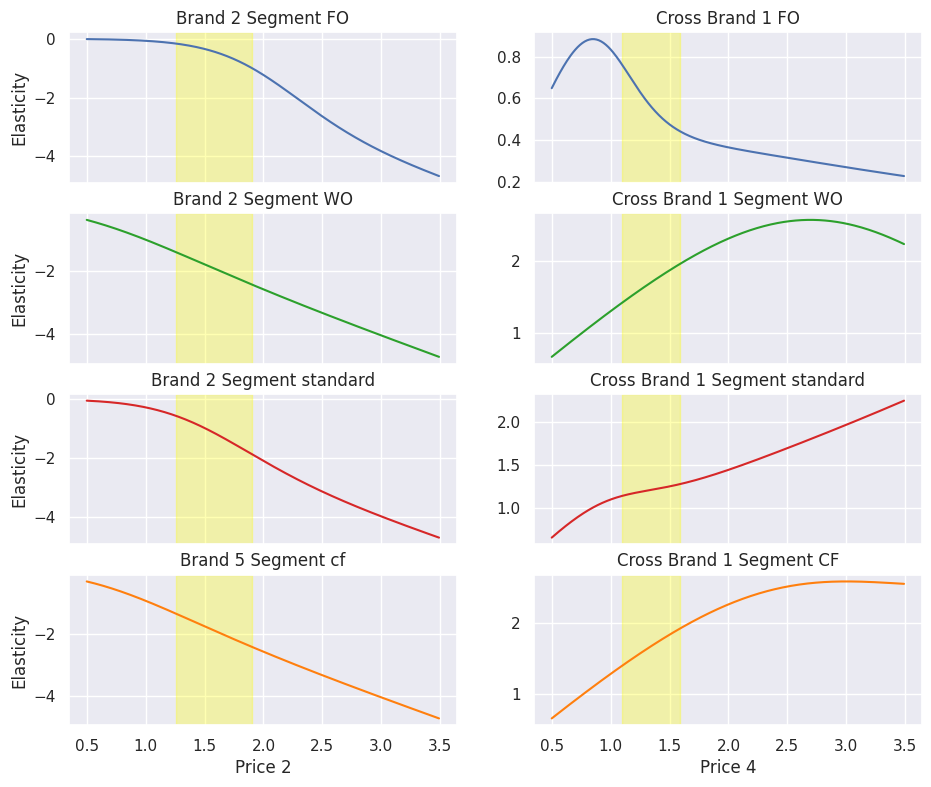

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
fig1, (ax2, ax3, ax4, ax5) = plt.subplots(4, 2, figsize = (11, 9), sharex = True)

own_min =1.26
own_max = 1.9
cross_min = 1.1
cross_max = 1.59
ax2[0].plot(price_range, pe_ownBrand2_fo)
ax2[0].set_title('Brand 2 Segment FO')
ax2[0].set_ylabel('Elasticity')
ax2[0].axvspan(own_min, own_max, color='yellow', alpha=0.3)  # Highlight range

ax2[1].plot(price_range, pe_crossBrand1_fo)
ax2[1].set_title('Cross Brand 1 FO')
ax2[1].axvspan(cross_min, cross_max, color='yellow', alpha=0.3)

ax3[0].plot(price_range, pe_ownBrand2_wo, 'tab:green')
ax3[0].set_title('Brand 2 Segment WO')
ax3[0].set_ylabel('Elasticity')
ax3[0].axvspan(own_min, own_max, color='yellow', alpha=0.3)
ax3[1].plot(price_range, pe_crossBrand1_wo, 'tab:green')
ax3[1].set_title('Cross Brand 1 Segment WO')
ax3[1].axvspan(cross_min, cross_max, color='yellow', alpha=0.3)

ax4[0].plot(price_range, pe_ownBrand2_sd, 'tab:red')
ax4[0].set_title('Brand 2 Segment standard')
ax4[0].set_ylabel('Elasticity')
ax4[0].axvspan(own_min, own_max, color='yellow', alpha=0.3)
ax4[1].plot(price_range, pe_crossBrand1_sd, 'tab:red')
ax4[1].set_title('Cross Brand 1 Segment standard')
ax4[1].axvspan(cross_min, cross_max, color='yellow', alpha=0.3)

ax5[0].plot(price_range, pe_ownBrand2_cf, 'tab:orange')
ax5[0].set_title('Brand 5 Segment cf')
ax5[0].set_xlabel('Price 2')
ax5[0].set_ylabel('Elasticity')
ax5[0].axvspan(own_min, own_max, color='yellow', alpha=0.3)
ax5[1].plot(price_range,pe_crossBrand1_cf, 'tab:orange')
ax5[1].set_title('Cross Brand 1 Segment CF')
ax5[1].set_xlabel('Price 4')
ax5[1].axvspan(cross_min, cross_max, color='yellow', alpha=0.3)

For Career Focused
Strong Substitutability from 0.5 to 1.62: We've established that from a price of 0.5 up to 1.62, Brand 1 has a cross-price elasticity (PE) greater than the own price elasticity of Brand 2, making Brand 1 a strong substitute for Brand 2 within this range. Interpretation for Brand 1's Selling Range (1.1 to 1.5):

Since Brand 1 typically sells within the range of 1.1 to 1.5, and this range falls within the broader 0.5 to 1.62 range where Brand 1 is considered a strong substitute for Brand 2, we can conclude that within its natural selling range, Brand 1 is a strong substitute for Brand 2.

## Overall, for all clusters Brand 1 is strong substitution for Brand 2.


# Saving Models

In [ ]:
pickle.dump(WO_pp_model, open('drive/MyDrive/WO_pp_model.pickle','wb'))
pickle.dump(CF_pp_model, open('drive/MyDrive/CF_pp_model.pickle','wb'))
pickle.dump(Standard_pp_model, open('drive/MyDrive/Standard_pp_model.pickle','wb'))
pickle.dump(FO_pp_model, open('drive/MyDrive/FO_pp_model.pickle','wb'))
pickle.dump(model_ownBrand2, open('drive/MyDrive/model_ownBrand2.pickle','wb'))
pickle.dump(model_ownBrand2_cf, open('drive/MyDrive/model_ownBrand2_cf.pickle','wb'))
pickle.dump(model_ownBrand2_fo, open('drive/MyDrive/model_ownBrand2_fo.pickle','wb'))
pickle.dump(model_ownBrand2_sd, open('drive/MyDrive/model_ownBrand2_sd.pickle','wb'))